Импорты

In [ ]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
import numpy as np
from textblob import TextBlob

Загрузка набора данных Covid 19 Indian Sentiments on covid19 and lockdown

In [3]:
covid_data=pd.read_csv("finalSentimentdata2.csv",delimiter=",")
del covid_data[covid_data.columns[0]]

In [ ]:
covid_data.head(10)

,sentiment,text
0,sad,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...
5,fear,joe biden's coronavirus web address lands on a...
6,sad,respected sir in our telangana all private tea...
7,fear,so is also 20 times more lethal than influenza...
8,sad,thull is passing the most dangerous and ultra ...
9,sad,thull is passing the most dangerous and ultra ...


Оставим только те записи, в которых значение sentiment либо joy, либо sad

In [4]:
covid_data = covid_data[(covid_data['sentiment'] == 'joy') | (covid_data['sentiment'] == 'sad')]

In [ ]:
covid_data.head(10)

,sentiment,text
0,sad,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...
6,sad,respected sir in our telangana all private tea...
8,sad,thull is passing the most dangerous and ultra ...
9,sad,thull is passing the most dangerous and ultra ...
11,joy,| is officially free city and the celebration ...
13,sad,… i do not understand the point of demanding e...


#Предварительная обработка данных

Приведение к нижнему регистру

In [5]:
lowered = covid_data['text'].str.lower()
covid_data['lowered'] = lowered

Удаление неинформативных данных (хештеги и отметки пользователей)

In [60]:
for i in range(len(covid_data)):
  covid_data.iloc[i, 4] = re.sub("@[A-Za-z0-9_]+","", covid_data.iloc[i, 4])
  covid_data.iloc[i, 4] = re.sub("#[A-Za-z0-9_]+","", covid_data.iloc[i, 4])

Токенизация

In [8]:
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
tokened = covid_data.apply(lambda row: nltk.word_tokenize(row['lowered']), axis=1)
covid_data['tokenized'] = tokened

In [10]:
covid_data.head(10)

,sentiment,text,lowered,tokenized
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, the, poor, in, india, are, treated, ba..."
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[if, only, i, could, have, spent, the, with, t..."
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[will, nature, conservation, remain, a, priori..."
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, in, italy, show, t..."
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol..."
6,sad,respected sir in our telangana all private tea...,respected sir in our telangana all private tea...,"[respected, sir, in, our, telangana, all, priv..."
8,sad,thull is passing the most dangerous and ultra ...,thull is passing the most dangerous and ultra ...,"[thull, is, passing, the, most, dangerous, and..."
9,sad,thull is passing the most dangerous and ultra ...,thull is passing the most dangerous and ultra ...,"[thull, is, passing, the, most, dangerous, and..."
11,joy,| is officially free city and the celebration ...,| is officially free city and the celebration ...,"[|, is, officially, free, city, and, the, cele..."
13,sad,… i do not understand the point of demanding e...,… i do not understand the point of demanding e...,"[…, i, do, not, understand, the, point, of, de..."


Удаление стоп-слов

In [12]:
noise = stopwords.words('english')
withoutstop = covid_data['tokenized'].apply(lambda x: [item for item in x if item not in noise])
without_stop = []
for a in withoutstop:    
    without_stop.append(", ".join(a))
covid_data['without_stop'] = without_stop

In [10]:
covid_data.head(10)

,sentiment,text,lowered,tokenized,without_stop
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, the, poor, in, india, are, treated, ba...","agree, poor, india, treated, badly, poors, see..."
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[if, only, i, could, have, spent, the, with, t...","could, spent, cutie, vc, sakshi__s, n, g, h, c..."
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[will, nature, conservation, remain, a, priori...","nature, conservation, remain, priority, post, ..."
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, in, italy, show, t...","coronavirus, disappearing, italy, show, ``, in..."
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol...","uk, records, lowest, daily, virus, death, toll..."
6,sad,respected sir in our telangana all private tea...,respected sir in our telangana all private tea...,"[respected, sir, in, our, telangana, all, priv...","respected, sir, telangana, private, teachers, ..."
8,sad,thull is passing the most dangerous and ultra ...,thull is passing the most dangerous and ultra ...,"[thull, is, passing, the, most, dangerous, and...","thull, passing, dangerous, ultra, hazardous, s..."
9,sad,thull is passing the most dangerous and ultra ...,thull is passing the most dangerous and ultra ...,"[thull, is, passing, the, most, dangerous, and...","thull, passing, dangerous, ultra, hazardous, s..."
11,joy,| is officially free city and the celebration ...,| is officially free city and the celebration ...,"[|, is, officially, free, city, and, the, cele...","|, officially, free, city, celebration, goes"
13,sad,… i do not understand the point of demanding e...,… i do not understand the point of demanding e...,"[…, i, do, not, understand, the, point, of, de...","…, understand, point, demanding, enough, time,..."


Перед проведение векторизации разделим датасет на обучающию и тестовые выборки

In [13]:
x_train, x_test, y_train, y_test = train_test_split(covid_data.without_stop, covid_data.sentiment, train_size = 0.7)

Векторизация

In [15]:
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_x_train = vectorizer.fit_transform(x_train)
vectorized_x_test = vectorizer.transform(x_test)

In [16]:
vectorized_x_train

<1065x32365 sparse matrix of type '<class 'numpy.int64'>'
	with 45756 stored elements in Compressed Sparse Row format>

In [17]:
vectorized_x_test

<457x32365 sparse matrix of type '<class 'numpy.int64'>'
	with 7432 stored elements in Compressed Sparse Row format>

#Обучение классификаторов (наивный байесовский и k-средних)

###Наивный байесовский

In [18]:
#импорт классификатора
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
#импорт метрик качества
from sklearn.metrics import * 

In [19]:
#обучаем с помощью векторизованной обучающей выборки
clf.fit(vectorized_x_train, y_train)
#получаем предсказание для векторизованной тестовой выборки
bayes_pred = clf.predict(vectorized_x_test)
#сравниваем реальные метки с предсказанными
print(classification_report(y_test, bayes_pred))

              precision    recall  f1-score   support

         joy       0.88      0.72      0.79       218
         sad       0.78      0.91      0.84       239

    accuracy                           0.82       457
   macro avg       0.83      0.81      0.81       457
weighted avg       0.83      0.82      0.82       457



Accuracy (точность) - это метрика, которая измеряет общую точность модели. Для данной модели она равна 0.81, что означает, что 81% объектов были правильно классифицированы.

Precision (точность) - это метрика, которая измеряет, как много объектов, отнесенных к данному классу, действительно принадлежат к этому классу.

Recall (полнота) - это метрика, которая измеряет, как много объектов из данного класса были правильно классифицированы. 

###К-средних

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(vectorized_x_train, y_train)
knn_pred = knn.predict(vectorized_x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         joy       0.48      1.00      0.65       218
         sad       1.00      0.03      0.05       239

    accuracy                           0.49       457
   macro avg       0.74      0.51      0.35       457
weighted avg       0.75      0.49      0.34       457



Accuracy = 51%, что ниже, чем у байесовского классификатора

Сильного улучшения модели, путем изменения параметров, добиться не удалось, поэтому принято решение продолжать работать с исходными параметрами

#Применение шагов предобработки на наборе данных COVID19 Tweets

In [21]:
tweets=pd.read_csv("covid19_tweets.csv",delimiter=",")

In [41]:
tweets.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


In [22]:
for i in range(len(tweets)):
  tweets.iloc[i, 9] = re.sub("@[A-Za-z0-9_]+","", tweets.iloc[i, 9])
  tweets.iloc[i, 9] = re.sub("#[A-Za-z0-9_]+","", tweets.iloc[i, 9])

In [23]:
lowered = tweets['text'].str.lower()
tweets['lowered'] = lowered

In [ ]:
tweets.head(10)

In [24]:
tokened = tweets.apply(lambda row: nltk.word_tokenize(row['lowered']), axis=1)
tweets['tokenized'] = tokened

In [ ]:
tweets.head(10)

In [25]:
noise = stopwords.words('english')
withoutstop = tweets['tokenized'].apply(lambda x: [item for item in x if item not in noise])
without_stop = []
for a in withoutstop:    
    without_stop.append(", ".join(a))
tweets['without_stop'] = without_stop

In [61]:
tweets.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,lowered,tokenized,without_stop
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,if i smelled the scent of hand sanitizers toda...,"[if, i, smelled, the, scent, of, hand, sanitiz...","smelled, scent, hand, sanitizers, today, someo..."
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey and - wouldn't it have made more sense ...,NaN,Twitter for Android,False,hey and - wouldn't it have made more sense ...,"[hey, and, -, would, n't, it, have, made, more...","hey, -, would, n't, made, sense, players, pay,..."
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed was a hoax. We al...,['COVID19'],Twitter for Android,False,trump never once claimed was a hoax. we al...,"[trump, never, once, claimed, was, a, hoax, .,...","trump, never, claimed, hoax, ., claim, effort,..."
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The one gift has give me is an appreciation ...,['COVID19'],Twitter for iPhone,False,the one gift has give me is an appreciation ...,"[the, one, gift, has, give, me, is, an, apprec...","one, gift, give, appreciation, simple, things,..."
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel \n … htt...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 july : media bulletin on novel \n … htt...,"[25, july, :, media, bulletin, on, novel, …, h...","25, july, :, media, bulletin, novel, …, https,..."
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue to rise. It's almost as bad...,"['coronavirus', 'covid19']",Twitter Web App,False,deaths continue to rise. it's almost as bad...,"[deaths, continue, to, rise, ., it, 's, almost...","deaths, continue, rise, ., 's, almost, bad, ev..."
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How Will Change Work in General (and recruiti...,"['COVID19', 'Recruiting']",Buffer,False,how will change work in general (and recruiti...,"[how, will, change, work, in, general, (, and,...","change, work, general, (, recruiting, ,, speci..."
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,you now have to wear face coverings when out s...,"[you, now, have, to, wear, face, coverings, wh...","wear, face, coverings, shopping, -, includes, ..."
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of .\n\n,"['covid19', 'covidPositive']",Twitter for Android,False,praying for good health and recovery of .\n\n,"[praying, for, good, health, and, recovery, of...","praying, good, health, recovery, ."
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,pope as god - prophet sadhu sundar selvaraj. w...,"[pope, as, god, -, prophet, sadhu, sundar, sel...","pope, god, -, prophet, sadhu, sundar, selvaraj..."


#Предсказание для нового датасета

In [26]:
x_tweets=tweets["without_stop"]

In [27]:
vectorized_x_tweets = vectorizer.transform(x_tweets)
bayes_pred_tweets = clf.predict(vectorized_x_tweets)

In [29]:
print (bayes_pred_tweets)

['sad' 'joy' 'sad' ... 'sad' 'joy' 'joy']


In [30]:
tweets['class']=bayes_pred_tweets

In [31]:
tweets.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,lowered,tokenized,without_stop,class
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,if i smelled the scent of hand sanitizers toda...,"[if, i, smelled, the, scent, of, hand, sanitiz...","smelled, scent, hand, sanitizers, today, someo...",sad
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey and - wouldn't it have made more sense ...,NaN,Twitter for Android,False,hey and - wouldn't it have made more sense ...,"[hey, and, -, would, n't, it, have, made, more...","hey, -, would, n't, made, sense, players, pay,...",joy
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed was a hoax. We al...,['COVID19'],Twitter for Android,False,trump never once claimed was a hoax. we al...,"[trump, never, once, claimed, was, a, hoax, .,...","trump, never, claimed, hoax, ., claim, effort,...",sad
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The one gift has give me is an appreciation ...,['COVID19'],Twitter for iPhone,False,the one gift has give me is an appreciation ...,"[the, one, gift, has, give, me, is, an, apprec...","one, gift, give, appreciation, simple, things,...",joy
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel \n … htt...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 july : media bulletin on novel \n … htt...,"[25, july, :, media, bulletin, on, novel, …, h...","25, july, :, media, bulletin, novel, …, https,...",sad
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue to rise. It's almost as bad...,"['coronavirus', 'covid19']",Twitter Web App,False,deaths continue to rise. it's almost as bad...,"[deaths, continue, to, rise, ., it, 's, almost...","deaths, continue, rise, ., 's, almost, bad, ev...",sad
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How Will Change Work in General (and recruiti...,"['COVID19', 'Recruiting']",Buffer,False,how will change work in general (and recruiti...,"[how, will, change, work, in, general, (, and,...","change, work, general, (, recruiting, ,, speci...",joy
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,you now have to wear face coverings when out s...,"[you, now, have, to, wear, face, coverings, wh...","wear, face, coverings, shopping, -, includes, ...",joy
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of .\n\n,"['covid19', 'covidPositive']",Twitter for Android,False,praying for good health and recovery of .\n\n,"[praying, for, good, health, and, recovery, of...","praying, good, health, recovery, .",joy
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,pope as god - prophet sadhu sundar selvaraj. w...,"[pope, as, god, -, prophet, sadhu, sundar, sel...","pope, god, -, prophet, sadhu, sundar, selva

###Доля класса sad

In [35]:
count = np.count_nonzero( bayes_pred_tweets== 'sad')
all=len(bayes_pred_tweets)
sad_part=round((count/all)*100,2)
print('Количество твитов в классе sad =',count)
print ('Всего твитов =',all)
print ('Доля класса sad =',sad_part,'%')

Количество твитов в классе sad= 97679
Всего твитов= 179108
Доля класса sad= 54.54 %


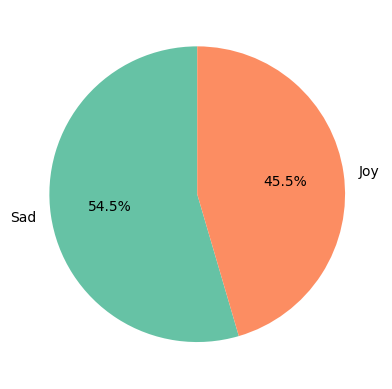

In [58]:
labels = ['Sad', 'Joy']
sizes = [sad_part, 100-sad_part]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()

#Анализ тональности постов из набора данных COVID19 Tweets с помощью библиотеки TextBlob.

In [38]:
sentiment = []

for text in tweets.loc[:, 'without_stop']:
  blob = TextBlob(text)

# Get the polarity score (-1 to 1)
  polarity = blob.sentiment.polarity
  if polarity > 0:
    sentiment.append("Positive")
  elif polarity < 0:
    sentiment.append("Negative")
  else:
    sentiment.append("Neutral")

In [39]:
print (sentiment)

['Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'P

In [40]:
tweets['sentiment']=sentiment

In [41]:
tweets.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,lowered,tokenized,without_stop,class,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,if i smelled the scent of hand sanitizers toda...,"[if, i, smelled, the, scent, of, hand, sanitiz...","smelled, scent, hand, sanitizers, today, someo...",sad,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey and - wouldn't it have made more sense ...,NaN,Twitter for Android,False,hey and - wouldn't it have made more sense ...,"[hey, and, -, would, n't, it, have, made, more...","hey, -, would, n't, made, sense, players, pay,...",joy,Neutral
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed was a hoax. We al...,['COVID19'],Twitter for Android,False,trump never once claimed was a hoax. we al...,"[trump, never, once, claimed, was, a, hoax, .,...","trump, never, claimed, hoax, ., claim, effort,...",sad,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The one gift has give me is an appreciation ...,['COVID19'],Twitter for iPhone,False,the one gift has give me is an appreciation ...,"[the, one, gift, has, give, me, is, an, apprec...","one, gift, give, appreciation, simple, things,...",joy,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel \n … htt...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 july : media bulletin on novel \n … htt...,"[25, july, :, media, bulletin, on, novel, …, h...","25, july, :, media, bulletin, novel, …, https,...",sad,Neutral


###Процентное соотношение постов разных настроений

In [54]:
Neutral_count=sentiment.count("Neutral")
Positive_count=sentiment.count("Positive")
Negative_count=sentiment.count("Negative")

Neutral_part=round((Neutral_count/len(sentiment))*100,2)
Positive_part=round((Positive_count/len(sentiment))*100,2)
Negative_part=round((Negative_count/len(sentiment))*100,2)

print ("Доля нейтральных твитов", Neutral_part,'%')
print ("Доля положительных твитов", Positive_part,'%')
print ("Доля негативных твитов", Negative_part,'%')

Доля нейтральных твитов 45.55 %
Доля положительных твитов 38.63 %
Доля негативных твитов 15.82 %


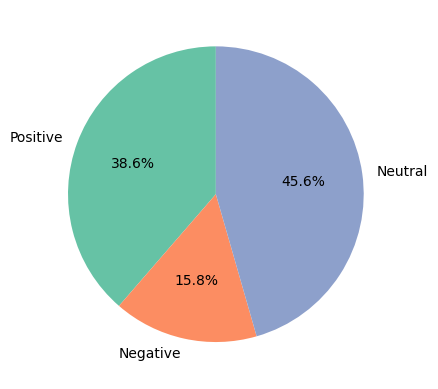

In [59]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [Positive_part, Negative_part, Neutral_part]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()